In [55]:
using QuantumOptics
using NBInclude
using Einsum
#using DataFrames
using LinearAlgebra
# lattice
@nbinclude("Lattice_Basis_Neighbors_Hops.ipynb"; regex=r"#.*executeme")
# mb tools
@nbinclude("QOJulia_utils.ipynb")

proj_MB_Int (generic function with 1 method)

In [57]:
param_dict=Dict{}()

LL = [8,10]
N = LL[1]*LL[2]
vv_lattice = [ [1., 0], [0, 1.] ]
b1=[0, 0]
vv_basis = [b1]
param_dict["N"] = LL[1]*LL[2]

param_dict["LL"] = LL
param_dict["vv_lattice"] = vv_lattice
param_dict["vv_basis"] = vv_basis

nb=1 # number of basis
t=-1 # hopping amplitude
p=1
q=LL[2]
ϕ=p/q # magnetic flux per plaquet
param_dict["gauge"] = "Landau"
param_dict["t"]=t
param_dict["ϕ"]=ϕ
θθ = [0, 0] # initial values for twist angles
param_dict["θθ"]=θθ

sites, site_coord, site_number = get_sites(LL, vv_lattice, vv_basis);
param_dict["sites"] = sites
param_dict["site_coord"] = site_coord
param_dict["site_number"] = site_number

pbc=true # periodic boundary condition
param_dict["pbc"] = pbc
neighbors = [ [1, 0, 1], [-1, 0, 1], [0, 1, 1], [0, -1, 1]  ]
neighbors_list = [ neighbors ]
param_dict["neighbors_list"] = neighbors_list

1-element Vector{Vector{Vector{Int64}}}:
 [[1, 0, 1], [-1, 0, 1], [0, 1, 1], [0, -1, 1]]

In [58]:
function Vpin(site, V0, site_number, LL)
        i_site = site_number[site]
        dimH = LL[1]*LL[2]
        VV   = zeros(dimH,dimH)
        VV[i_site, i_site] = -V0
        return VV
end

Vpin (generic function with 2 methods)

In [385]:
function Vimp(sites,VV0,site_number,LL)
    dimH = LL[1]*LL[2]
    VM   = zeros(dimH,dimH)
    for (site, V0) in zip(sites,VV0) 
        VM += Vpin(site, V0, site_number, LL)
    end
    return VM
end

Vimp (generic function with 1 method)

In [487]:
function Vpin2(V0, xc, yc, w, sites, site_number, site_coord, LL)
        #xc, yc = site_coord[imp_site]
        dimH = LL[1]*LL[2]
        VV   = zeros(dimH,dimH)
        for site in sites
            i_site = site_number[site]
            x, y = site_coord[site]
            VV[i_site, i_site] = V0*(tanh(sqrt((x-xc)^2+(y-yc)^2)/w)^2-1)
        end
        return VV
end

Vpin2 (generic function with 2 methods)

In [492]:
function Vimp2(VV0, XX, YY, ww, sites, site_number, site_coord, LL)
    dimH = LL[1]*LL[2]
    VM   = zeros(dimH,dimH)
    for (xc, yc, V0, w) in zip(XX,YY,VV0,ww) 
        VM +=  Vpin2(V0, xc, yc, w, sites, site_number, site_coord, LL)
    end
    return VM
end

Vimp2 (generic function with 2 methods)

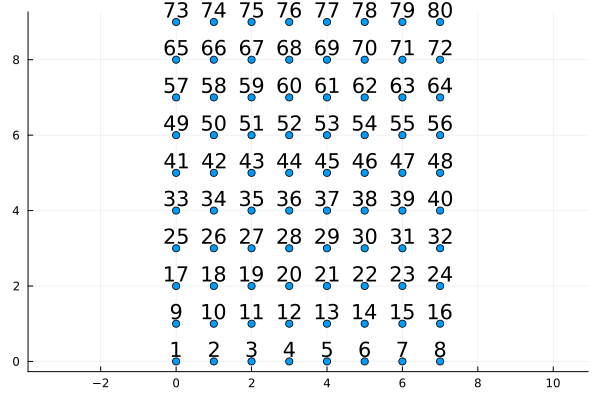

In [493]:
plot_points(sites, site_coord, site_number)

In [494]:
imp_site = sites[44]

3-element Vector{Int64}:
 3
 5
 1

In [495]:
xc, yc = site_coord[ imp_site ]

2-element Vector{Float64}:
 3.0
 5.0

In [536]:
V0 = 2
w = .5
#VimpM = Vpin(imp_site, V0, site_number, LL);
VimpM = Vpin2(V0, xc, yc, w, sites, site_number, site_coord, LL);

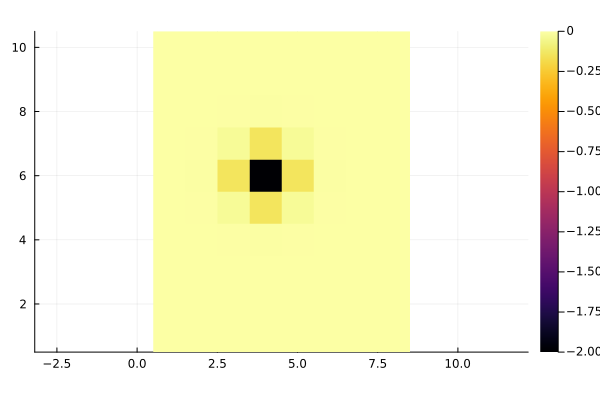

In [537]:
heatmap(reshape(diag(VimpM),8,10)', aspect_ratio=1)

In [546]:
imp_sites = [ sites[22], sites[60] ]
V0 = 2
λ = 0.9
xc1, yc1 = site_coord[ imp_sites[1] ]
xc2, yc2 = site_coord[ imp_sites[2] ]
XX = [ xc1, xc2+.0 ]
YY = [ yc1, yc2+.0 ]
VV0       = [ V0*0, V0 ]
ww        = [ w, w ]

2-element Vector{Float64}:
 0.5
 0.5

In [547]:
#VimpM = Vimp(imp_sites, VV0, site_number, LL);
VimpM = Vimp2(VV0, XX, YY, ww, sites, site_number, site_coord, LL);

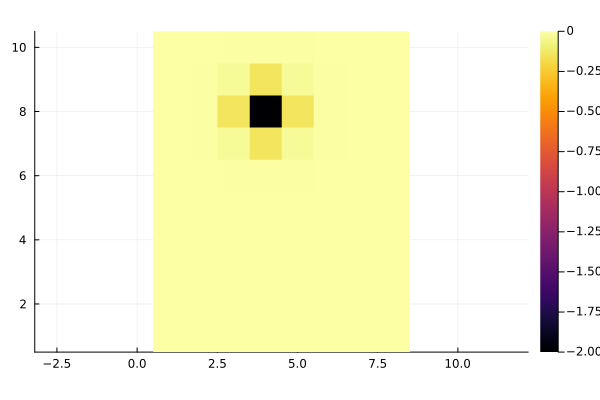

In [548]:
heatmap(reshape(diag(VimpM),8,10)', aspect_ratio=1)

In [549]:
basis = NLevelBasis(N) 
param_dict["basis"] = basis;

param_dict["model_H1"] = get_Hofstadter_hamiltonian

H_T = get_Hofstadter_hamiltonian(param_dict)
H_Kin = get_sp_op(basis, H_T)

Operator(dim=80x80)
  basis: NLevel(N=80)sparse([2, 8, 9, 73, 1, 3, 10, 74, 2, 4  …  77, 79, 7, 71, 78, 80, 8, 72, 73, 79], [1, 1, 1, 1, 2, 2, 2, 2, 3, 3  …  78, 78, 79, 79, 79, 79, 80, 80, 80, 80], ComplexF64[-1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im  …  -0.8090169943749473 - 0.5877852522924734im, -0.8090169943749473 + 0.5877852522924734im, -1.0 + 0.0im, -1.0 + 0.0im, -0.8090169943749473 - 0.5877852522924734im, -0.8090169943749473 + 0.5877852522924734im, -1.0 + 0.0im, -1.0 + 0.0im, -0.8090169943749473 + 0.5877852522924734im, -0.8090169943749473 - 0.5877852522924734im], 80, 80)

In [550]:
Vimp_op = get_sp_op(basis, VimpM)

Operator(dim=80x80)
  basis: NLevel(N=80)sparse([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  71, 72, 73, 74, 75, 76, 77, 78, 79, 80], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  71, 72, 73, 74, 75, 76, 77, 78, 79, 80], ComplexF64[-4.7118e-13 + 0.0im, -1.80389e-12 + 0.0im, -4.16289e-12 + 0.0im, -5.53158e-12 + 0.0im, -4.16289e-12 + 0.0im, -1.80389e-12 + 0.0im, -4.7118e-13 + 0.0im, -7.905e-14 + 0.0im, -1.777245e-11 + 0.0im, -8.245404e-11 + 0.0im  …  -2.568314751628e-5 + 0.0im, -5.5020159007e-7 + 0.0im, -4.36119415004e-6 + 0.0im, -9.763335546764e-5 + 0.0im, -0.0010435871518284 + 0.0im, -0.00268190136605173 + 0.0im, -0.0010435871518284 + 0.0im, -9.763335546764e-5 + 0.0im, -4.36119415004e-6 + 0.0im, -1.3620532968e-7 + 0.0im], 80, 80)

In [551]:
H1 = H_Kin + Vimp_op;

EE_Kin, UU_Kin = eigen(dense(H_Kin).data);

EE, UU = eigen(dense(H1).data);

EE, UUS = eigenstates(dense(H1));

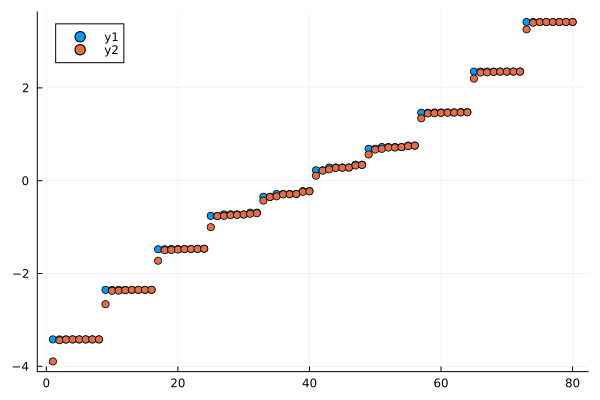

In [552]:
scatter(EE_Kin)
scatter!(EE)
#ylims!(-4,-3)

In [553]:
EE[1:3]

3-element Vector{Float64}:
 -3.8945982710915765
 -3.4381402742169995
 -3.4238539432119683

In [533]:
prs=[]
for i in 1:prod(LL)
    pr = sum( ( real( diag( dm(UUS[i]).data ) ) ).^2 )
    push!(prs,pr)
end

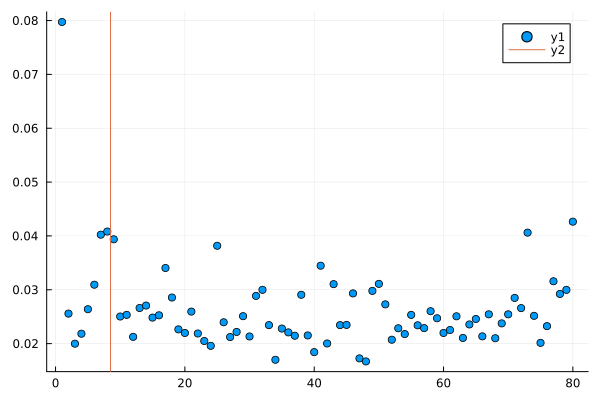

In [534]:
scatter(prs)
vline!([8.5])

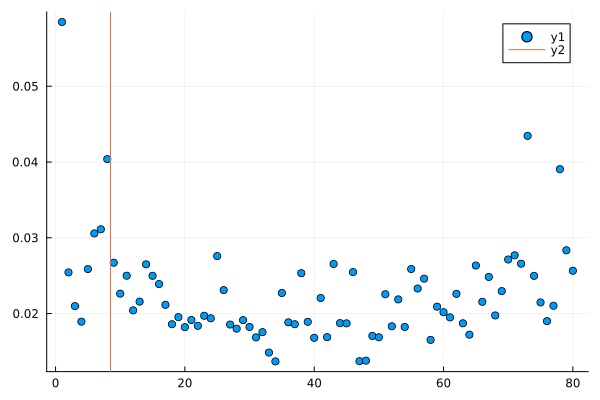

In [522]:
scatter(prs)
vline!([8.5])

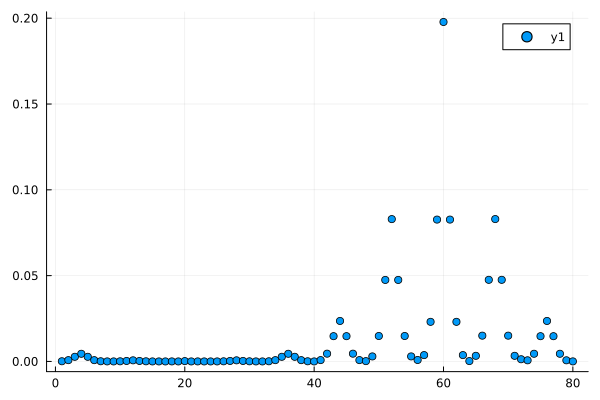

In [535]:
scatter(  real( diag( dm(UUS[1]).data ) ) )

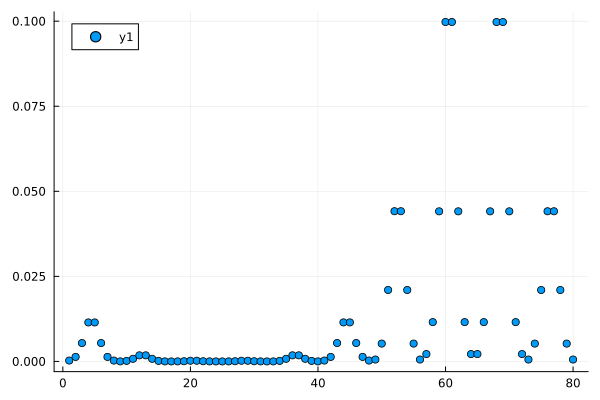

In [524]:
scatter(  real( diag( dm(UUS[1]).data ) ) )

In [511]:
A = UU[:,1:8]'*UU_Kin[:,1:8]

8×8 Matrix{ComplexF64}:
  0.00806963-0.207609im    …     -0.683149-0.00071958im
   -0.016425+0.474481im          -0.392454-0.000628164im
  -0.0242117+0.588198im          -0.334512-0.00110484im
   0.0123727-0.429434im          -0.403528+0.000491188im
  0.00187881+0.0877439im         -0.225939+0.00149494im
  -0.0180818+0.436168im    …      0.190575+0.00226797im
 0.000742621+0.0257571im      -0.000410825-0.000450849im
  8.42373e-5-0.00638774im       -0.0536964+0.0162354im

In [484]:
A'*A

8×8 Matrix{ComplexF64}:
     0.998676+0.0im          …  0.000160051+0.00422462im
   4.54669e-6-0.000362786im      -0.0012181+2.93999e-5im
 -0.000396006+0.00217662im       0.00714286+0.00100367im
  -0.00107633+0.00083277im       0.00286174+0.00339047im
   8.47601e-5-0.00209454im      -0.00699896-1.72294e-5im
  -0.00243139+0.00085173im   …   0.00304281+0.00781087im
   0.00023177+5.53038e-5im      0.000156768-0.000780166im
  0.000160051-0.00422462im          0.98597+0.0im

In [485]:
x = collect( -10:.1:10 )

201-element Vector{Float64}:
 -10.0
  -9.9
  -9.8
  -9.7
  -9.6
  -9.5
  -9.4
  -9.3
  -9.2
  -9.1
  -9.0
  -8.9
  -8.8
   ⋮
   8.9
   9.0
   9.1
   9.2
   9.3
   9.4
   9.5
   9.6
   9.7
   9.8
   9.9
  10.0

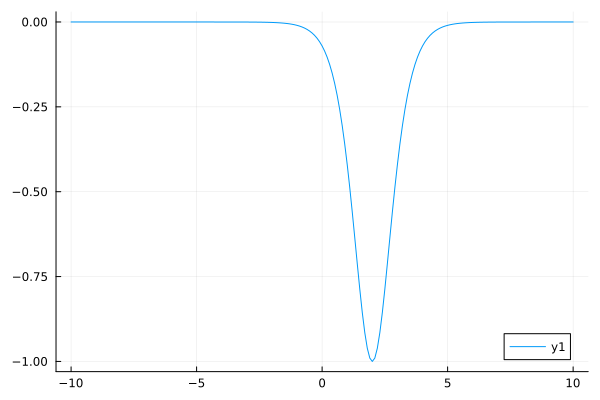

In [486]:
x0=2
w = 1
plot(x,V0*(tanh.((x.-x0)./w).^2).-1)